# 4. 차원 축소

In [3]:
#파이썬 패키지 불러오기
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib as plt

## 데이터 요약과 차원 축수
### 데이터 요약
* 데이터 요약은 데이터 탐색의 중요한 구성 요소
* 요약 통계(평균, 중앙값 등) 및 그래픽 요약
* 일반적인 요약 통계
    * 평균, 중앙값, 최소값, 최대값, 표준편차, 개수 및 백분율

### 차원 축소
* 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소하는 방법
* 정확도의 희생을 최소로 하여 독립 변수 또는 입력 변수의 차원을 축소하는 방법을 찾는 것
* 요인 선택(factor selection)또는 특징 추출(feature extraction)
* 데이터의 정보를 더 작은 하위 집합으로 압축하는 데 유용
* 유사한 범주를 결합하여 범주형 변수를 알 수 있음

## 차원 축소 방법
* 주어진 데이터에 도메인 지식을 적용해 범주를 제거하거나 결합하기
* 데이터 요약을 사용해 변수 간 중복 정보를 검출하고 불필요한 변수 및 범주를 제거하거나 합치기
* 데이터 변환 기술을 사용해 범주형 변수를 수치형 변수로 변환하기
* 주성분 분석(PCA)같은 자동화된 차원 축소 기술을 사용하기
    * 주성분 분석은 원래 수치 데이터셋을 더 적은 변수에 대부분의 원래 정보를 포함하는 원래 데이터의 더 작은 가중 평균 셋으로 변환

## 요약 통계

In [4]:
#colab ver
#pip install dmba
#import dmba
#bostonHousing_df = dmba.load_data('BostonHousing.csv')
#bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
#bostonHousing_df.head(9)

In [5]:
import dmba
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [6]:
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [7]:
#compute mean, standart deviation, min, max, median, length, and missing values of CRIM
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))

print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.613523557312254
Std. dev :  8.601545105332487
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


In [8]:
#Compute mean, standart dev., min, max, median, length, and missing values for all
#variables
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [9]:
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [10]:
bostonHousing_df = dmba.load_data('BostonHousing.csv')
bostonHousing_df=bostonHousing_df.rename(columns={'CAT.MEDV':'CAT_MEDV'})
bostonHousing_df.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

* 35개 지역은 CHAS값이 "1" (찰스강 경계에 인접)

In [11]:
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


In [12]:
#Create bins of size 1 for variable using the method pd.cut. By default, the method
#creates a categorical variable, e.g. (6, 7). The argument lables=False determains
#integers instead, e.g. 6.

#Compute the average of MEDV by (binned) RM and CHAS. First group the data frame
#using the groupby method, then restrict the analysis to MEDV and determine the
#mean for each group.
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

* 여러 변수에 대해 레코드를 취합하고 요약 통계량(도수, 평균값, 중앙값 등)을 계산

## 피벗 테이블

In [13]:
bostonHousing_df = pd.read_csv('BostonHousing.csv')
bostonHousing_df=bostonHousing_df.rename(columns={'CAT.MEDV':'CAT_MEDV'})
#create bins of size 1
bostonHousing_df['RM_bin']=pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

#use pivot table() to reshape data and generate pivot table
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'],
                aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


* 찰스강과 접하지 않는 방이 8개인 지역은 MEDV=45.7

## 상관 분석
* 변수의 중복 탐지에 좋음
* 매우 강한(양의 또는 음의) 상관관계가 있느 변수 쌍은 정보의 많은 부분이 겹쳐 있으므로, 이들 변수 중 하나를 제거함으로써 데이터를 축소할 수 있음
* 서로 강한 상관관계가 있는 변수를 제거하는 것은 다양한 모델에서 발생할 수 있는 다중 공선성 문제를 피하는데 유용
    * 다중 공선성(multicollinearity): 결과 변수와 같은 선형 관계를 공유하는 예측 변수가 2개 또는 그 이상이 있는 상태를 말함
* 상관 계수 표에 대한 히트맵을 사용해 강한 상관관계가 있는 변수들을 쉽게 식별 가능

## 범주 축소
* 범주의 개수가 많은 범주형 변수가 예측변수인 경우, 많은 데이터 마이닝 방법에서 이 변수를 다수의 가변수로 변환함
        
        * 예: 범주가 m개인 예측 변수는 분석법에 따라 m개 또는 m-1개의 가변수로 변환됨
    * 적은 수의 범주형 변수가 있을지라도 실제 데이터마이닝 방법에서 사용될 때는 데이터의 차원을 크게 늘릴 수 있음
    * 해결 방법: 가깝거나 유사한 범주를 하나로 합침으로써 범주의 수를 줄임
        * 범주를 합칠 경우에 전문가의 지식과 일반적인 상식이 요구됨
        * 피벗 테이블이 이러한 작업에 유용
            * 다양한 범주의 크기를 검토하고 각 범주에서 반응 변수가 어떻게 반응하는지 검토 가능
            * 일반적으로 관측치 개수가 적은 범주들은 다른 범주와 결합하기 좋음
            * 분석과 가장 관련 있는 범주들만 사용하고 나머지 범주는 '기타'로 표시할 수 있음
    * 예(그림 4-1): ZN에 의해 세분화된 반응변수 CAT.MEDV 분포에서 zn=17.5, 90, 95, 100일때 모든 지역이 CAT.MEDV=1로 분포가 동일한 경우 합칠 수 있음

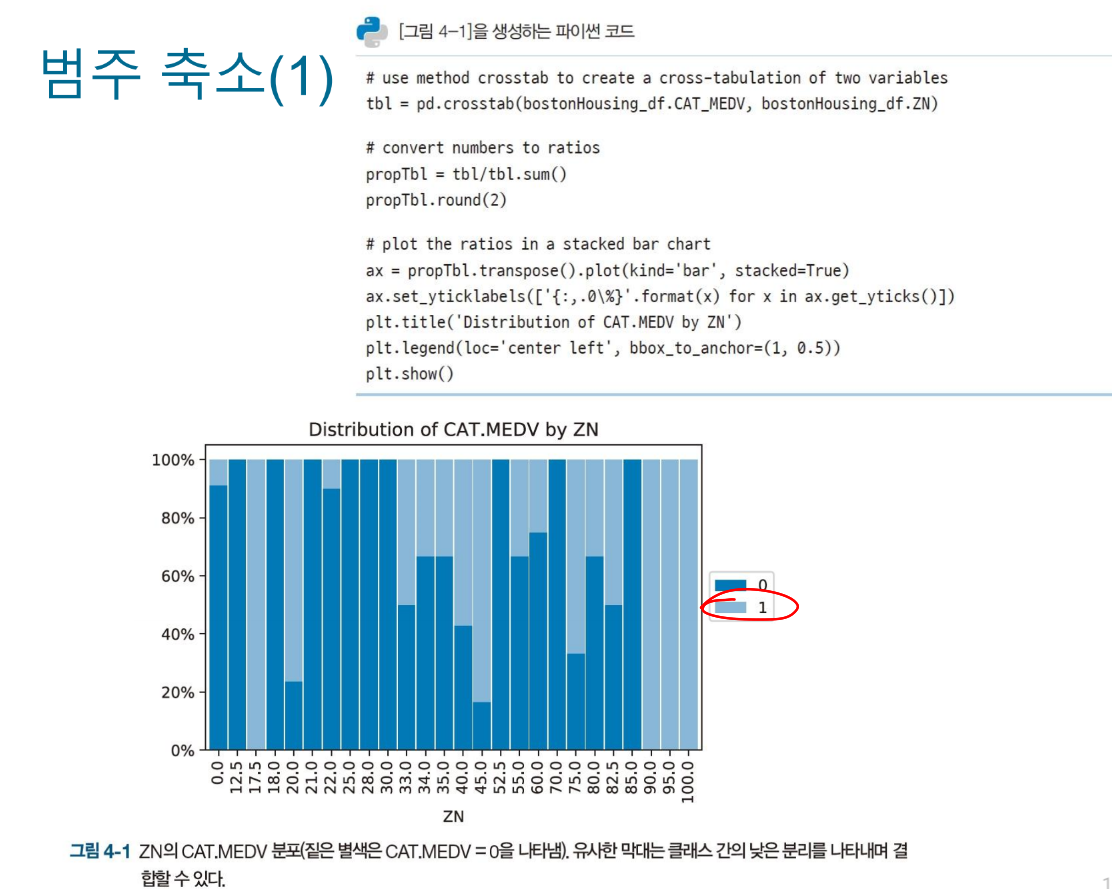

* 계절을 뜻하는 범주형 변수가 예측 변수로 있는 시계열 분석에서 시계열 그림을 검토하고 유사한 기간을 확인함으로써 범주를 축소할 수 있음
    * 4분기에서만 수익률이 다르게 나타나므로, 1\~3분기를 하나의 범주로 합할 수 있음

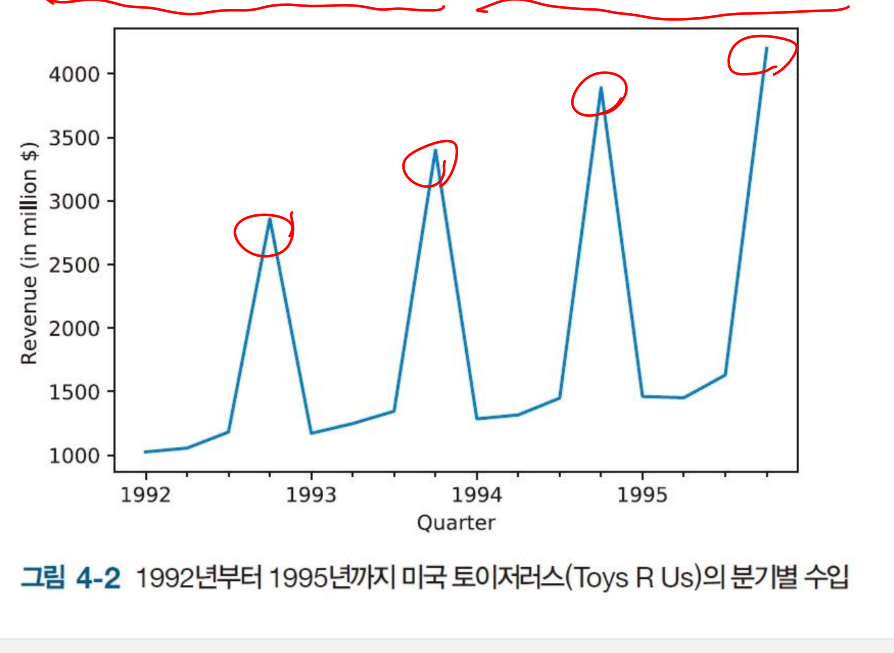

## 주성분 분석(PCA: Principal Component Analysis)
* 원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환하는 기법
* 특히 변수들의 수가 클 때 차원축소에 유용
* 데이터가 같은 스케일로 측정되고 상관관계가 높은 변수들을 포함할 때 특히 유용
* 원래 변수들을 가중 선형 결합(weighted linear combination)으로 재표현해 소수(대개 3개 정도)의 변수들을 새롭게 생성함
* 이렇게 생성된 소수의 새로운 변수는 데이터셋 전체가 가지고 있는 정보의 대부분을 유지함
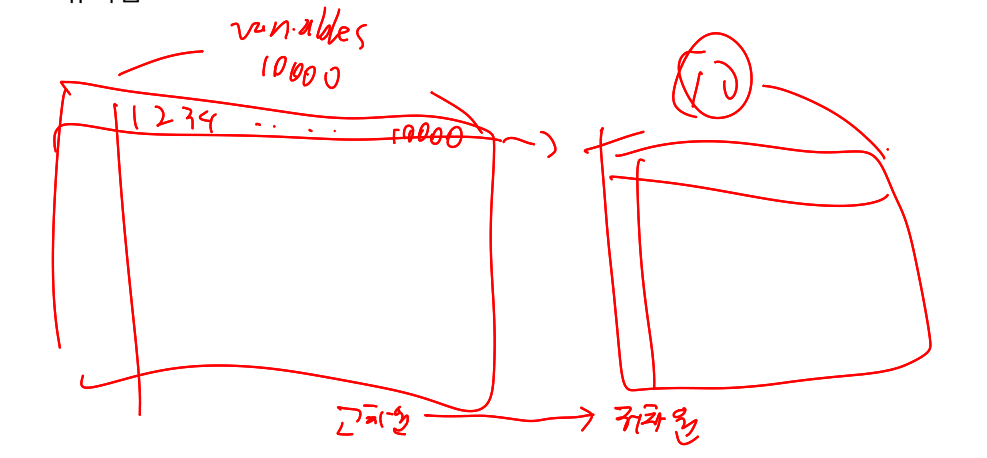

* 차원 축소를 통하여 저차원상에서 변수의 관계를 규명하는 다변량 자료분석 기법
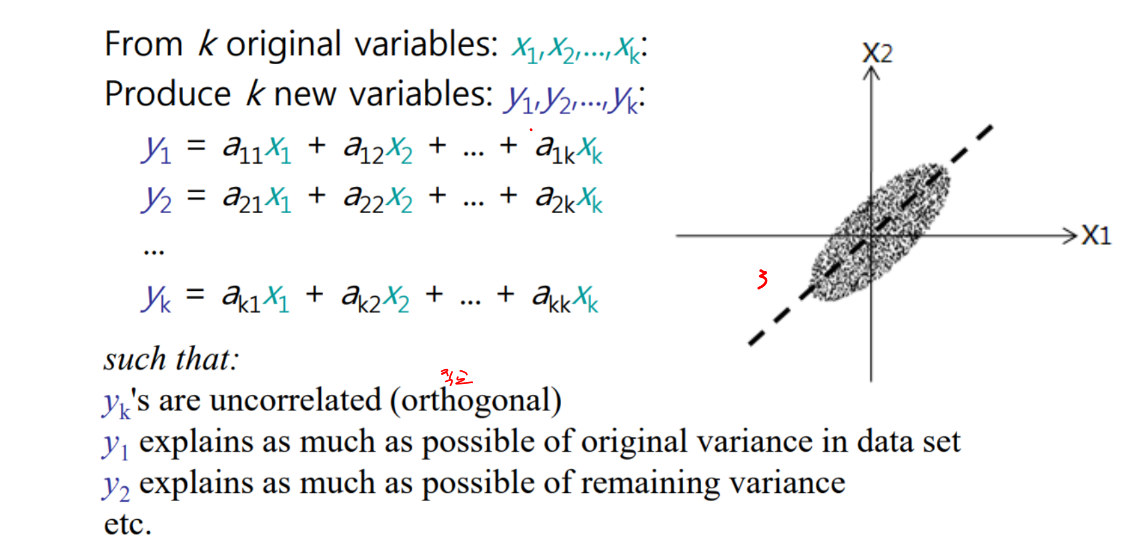

### 주성분(Principal Component, PC)이란?
    * 원 변수들을 선형 결합하여 주성분(PC)들을 생성함(주성분은 원변수와는 다른 새로운 변수임)
    * 원 변수들의 총 변동량과 주성분들(PCs)의 총 변동량은 같음
    * 첫 번째 주성분(PC1)은 변동량이 가장 크고, 두 번째 주성분(PC2)은 첫 번째 주성분과 직교하면서 변동량이 가장 큰 것임(주성분들은 서로 독립, 상관계수=0, 주성분은 변수의 개수만큼 추출이 가능)
    * 원 변수의 변동량을 크게 설명하는 주성분 개수 선택으로 차원축소를 이룸

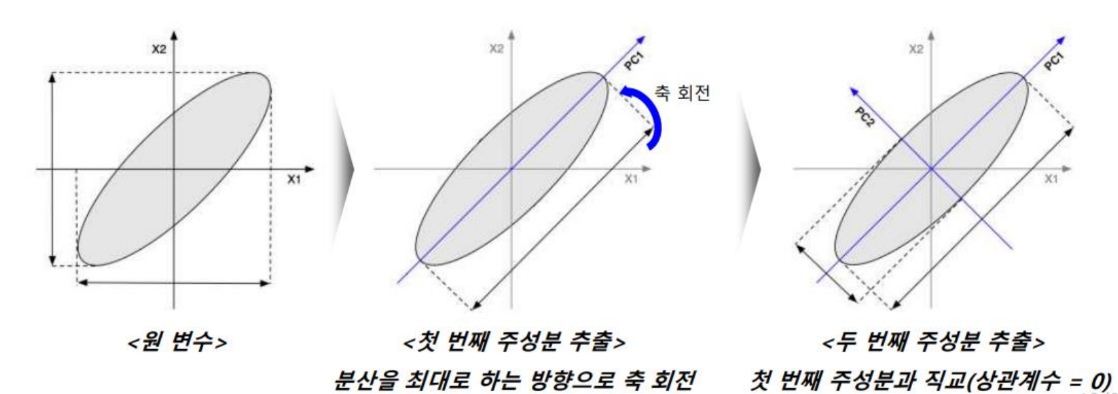

### 주성분(Principal Component, PC) 수 결정
* 분산 설명력
    * 전체 대이터 분산의 80% 이상을 설명할 수 있는 주성분까지 선택
* Scree plot
    * 고유치를 y축, 주성분의 수를 x축으로 한 도표인 scree plot을 이용하여, 고유치의 감소폭이 갑자기 줄어들기 바로 전까지 주성분을 선택
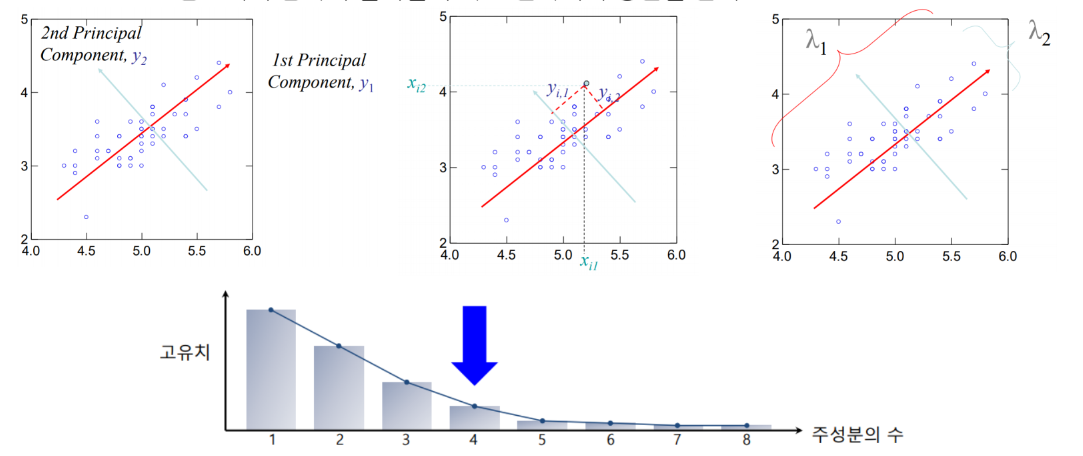

---

## 예제2. 아침 식사용 시리얼 데이터
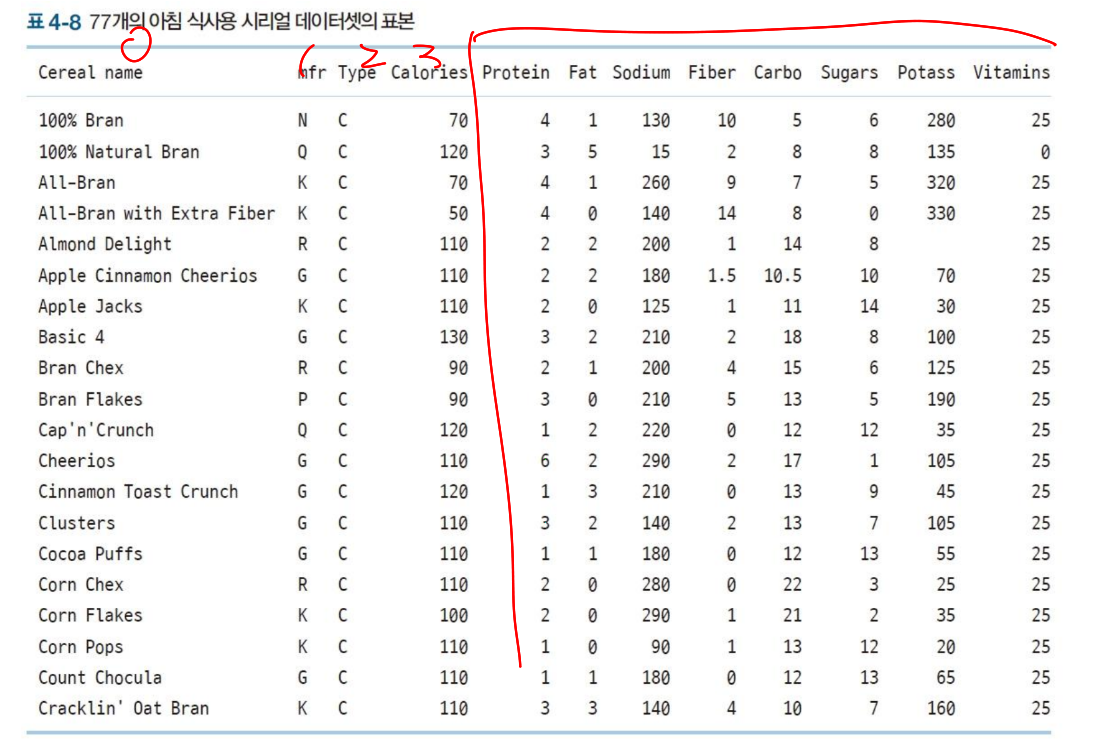

## 예제2. 아침 식사용 시리얼 데이터(칼로리와 소비자 평점)
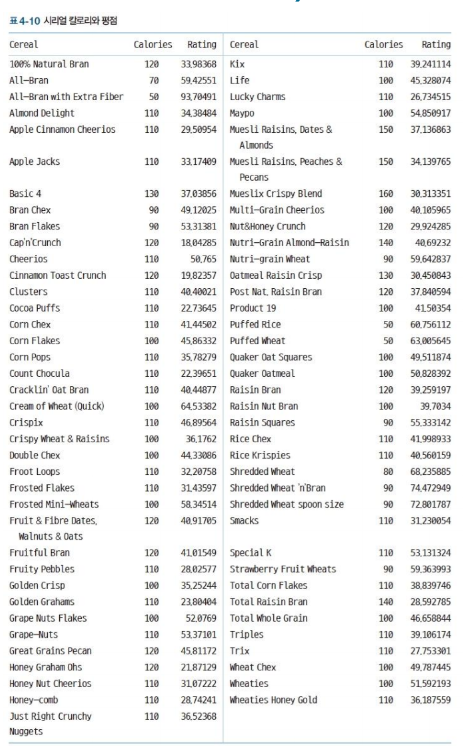

* 먼저, 칼로리와 소비자평점 2개의 변수에 초점
* 칼로리와 소비자 평점 변수 간의 공분산 행렬(S)

\begin{bmatrix}
379.63 &-188.68  \\
-188.68 &197.32  \\
\end{bmatrix}

> 칼로리와 소비자 평점은 강한 음의 상관관계

* 상관 관계

$0.69=\frac{-188.68}{\sqrt{(379.63)(197.32)}}$

* 두 변수의 전체변동 중 대략 69%가 실질적으로 두 변수가 공유하는 변동으로, 한 변수의 변동이 다른 변수에서 나타난 유사한 변동으로 중복되었다고 할 수 있음

## 주성분분석1
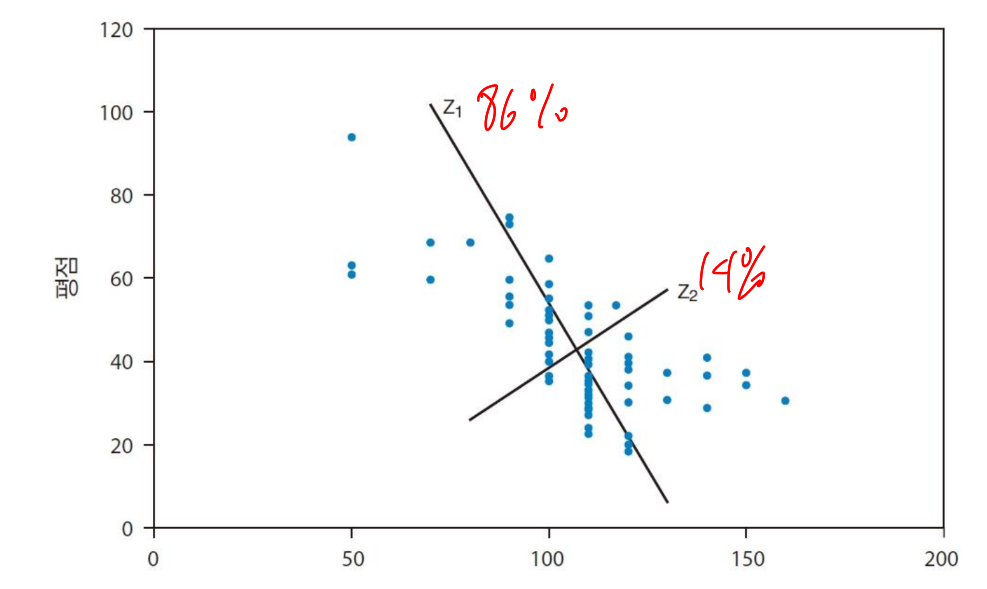

* z1은 총변동성의 86% 설명, z2는 나머지 14%를 설명
* z1의 가중치: (-0.847, 0.532), z의 가중치: (0.532, 0.847)
* 주성분점수: (평균을 뺀 후에) 칼로리와 평점을 새로운 축에 사용한 값으로 가중치는 주성분점수를 계산하는 데 사용됨.
    * 예: 100%Brain시리얼(칼로리 70, 평점 68.4)첫번째 주성분 점수: $(-0.847)(70-106.88)+(0.532)(68.4-42.67)=44.92$

In [19]:
cereals_df = dmba.load_data('Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

PCA(n_components=2)

In [20]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [21]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'],
                                index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [22]:
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]),
                      columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


### 주성분
* 주어진 변수 p개는 X1, X2, X3,..., Xp로 표기
* 가중 평균인 새로운 변수 집합 Z1, Z2, Z3,..., Zp를 찾음
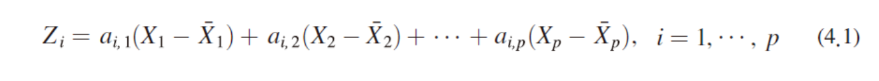
* Z변수들의 각 쌍에 관한 상관 관계는 0
* Z1은 가장 큰 분산, Zp는 가장 작은 분산을 가짐
* 일반적으로 처음 몇 개의 Z변수에 대부분의 정보가 포함되므로 나머지는 삭제 가능

In [24]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


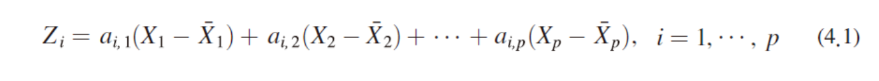

In [26]:
pcsComponents_df=pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                              index=cereals_df.iloc[:, 3:].columns)

pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,0.000757,0.008801,0.001026,0.003200,0.056176
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876


* 이 예에서 나트륨(sodium)이 첫 번째 주성분에 지배적
    * 가장 높은 (음의)가중치를 갖고 있음
    * 첫 번째 주성분이 실제로 시리얼에 나트륨이 얼마나 많이 포함되어 있는지를 측정한다는 의미
* 두 번째 주성분은 칼륨(potassium)양을 측정하는 것
* **그러나, 다른 영양소들은 그램으로 측정되는 반면, 나트륨과 칼륨은 밀리그램으로 측정되어 있기 때문에 이러한 결곽가 발생한 것임.**
* **이를 해결하는 방법 하나: PCA 수행 전에 데이터를 정규화함**

### 주성분 분석: 정규화
* 정규화
    * 정규화(또는 표준화)는 각각의 원래 변수를 분산이 1인 표준화된 변수로 대체하는 것으로, 정규화(표준화)를 통해 모든 변수에 동등한 중요성 부여
* 데이터 정규화를 언제 해야 할까?
    * 데이터의 성격에 따라 달려있음
    * 측정 단위가 모든 변수에 공통적이고(예: 달러), 변수의 스케일이 변수의 중요성을 반영할 때(예: 제트 연료 판매액, 난방 기름의 판매액)
        * 변수들을 정규화, 즉 분산이 1이 되도록 데이터의 스케일을 재조정하지 않는 것이 최선일 수 있음
    * 변수들이 다른 단위로 측정되어 변수 간의 변동성을 비교하는 방법이 불분명하거나(예: 일부는 달러 단위, 다른 변수들은 PPM단위), 변수들이 동일한 단위로 측정되었지만 변수의 스케일이 중요성을 반영하지 않는 경우(예: 주당 순이익, 총 수익)
        * 정규화 수행하는 것이 일반적

* PCA실행 전 정규화하기 위해
    * preprocessing.scale 사용
* 해석
    * 총 변동의 90% 설명하기 위해 7개의 주성분이 필요
    * 첫 번째 주성분
        * calories, cups
        * Protein, fiber, potassium, rating
    * 두번째 주성분
        * weight
    * 세 번째 주성분
        * carbohydrate

In [27]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [28]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


In [29]:
!pip install adjusttext

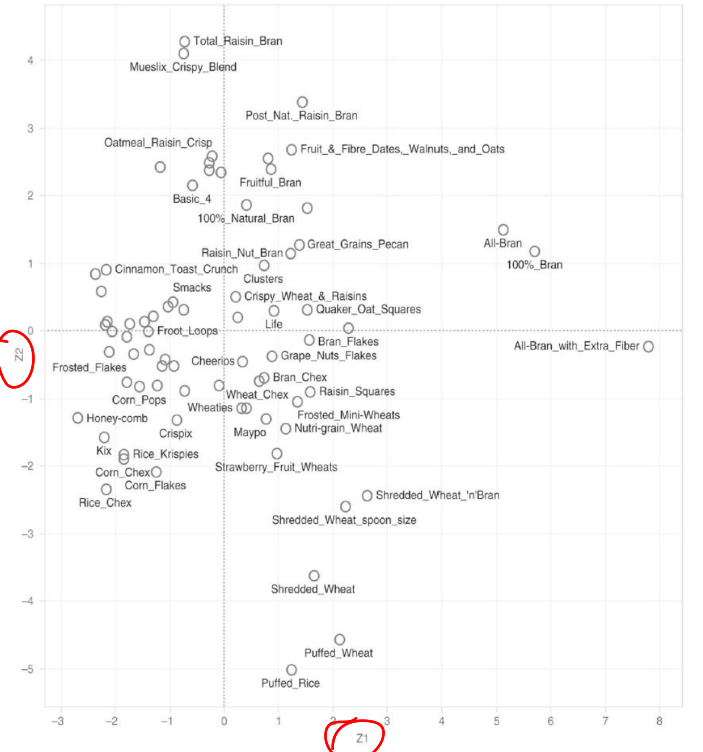

* 그림을 해석해보면,
    * 오른쪽에서 왼쪽으로 이동할수록 각 시리얼은 높은 칼로리와 낮은 단백질 및 식이섬유 등의 관점에서 건강에 좋지 않은 제품임을 알 수 있음
    * 아래쪽에서 위쪽으로 이동할수록 포만감을 주는 시리얼
* 흥미로운 군집이 발견될 때 특히 유용
    * 예: 아동용 시리얼들이 중앙에서 왼쪽부분에 몰려 있음

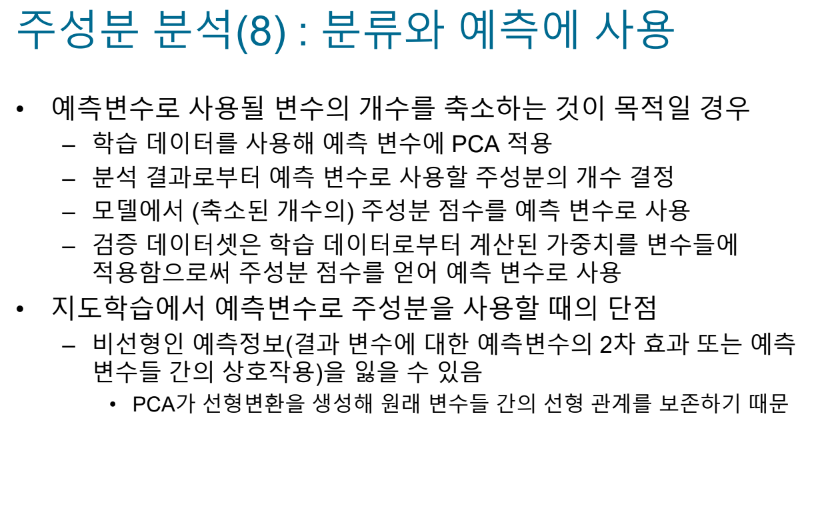

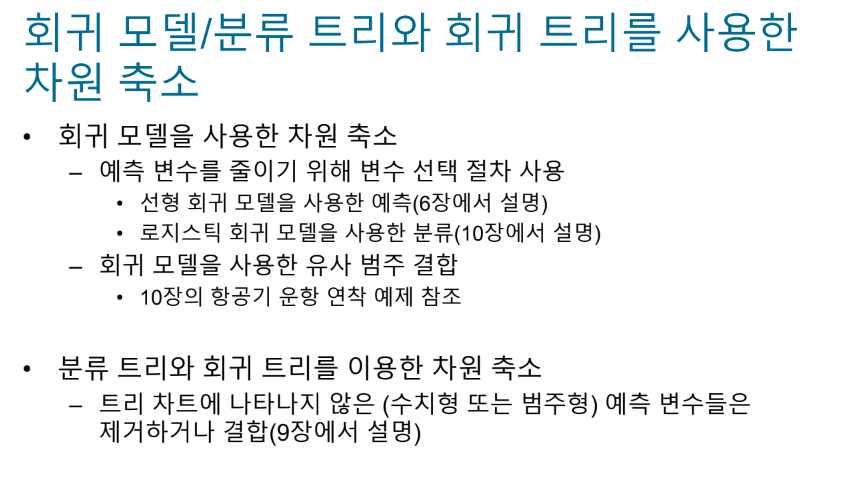